In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [ ]:
df = pd.read_csv("/content/adult.csv", na_values=['?'])
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.duplicated().sum()

np.int64(52)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
age,0
workclass,2795
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0


In [ ]:
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [ ]:
df[numeric_data].isna().sum()

,0
age,0
fnlwgt,0
educational-num,0
capital-gain,0
capital-loss,0
hours-per-week,0


In [ ]:
# categorical_data = df.select_dtypes(exclude==['number'])
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [ ]:
df[categorical_data].isna().sum()

,0
workclass,2795
education,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0
native-country,856
income,0


# **Numerical Features**

In [ ]:
df[numeric_data]

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
0,25,226802,7,0,0,40
1,38,89814,9,0,0,50
2,28,336951,12,0,0,40
3,44,160323,10,7688,0,40
4,18,103497,10,0,0,30
...,...,...,...,...,...,...
48837,27,257302,12,0,0,38
48838,40,154374,9,0,0,40
48839,58,151910,9,0,0,40
48840,22,201490,9,0,0,20


In [ ]:
df[numeric_data].describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0.5, 0.98, 'Numerical Features')

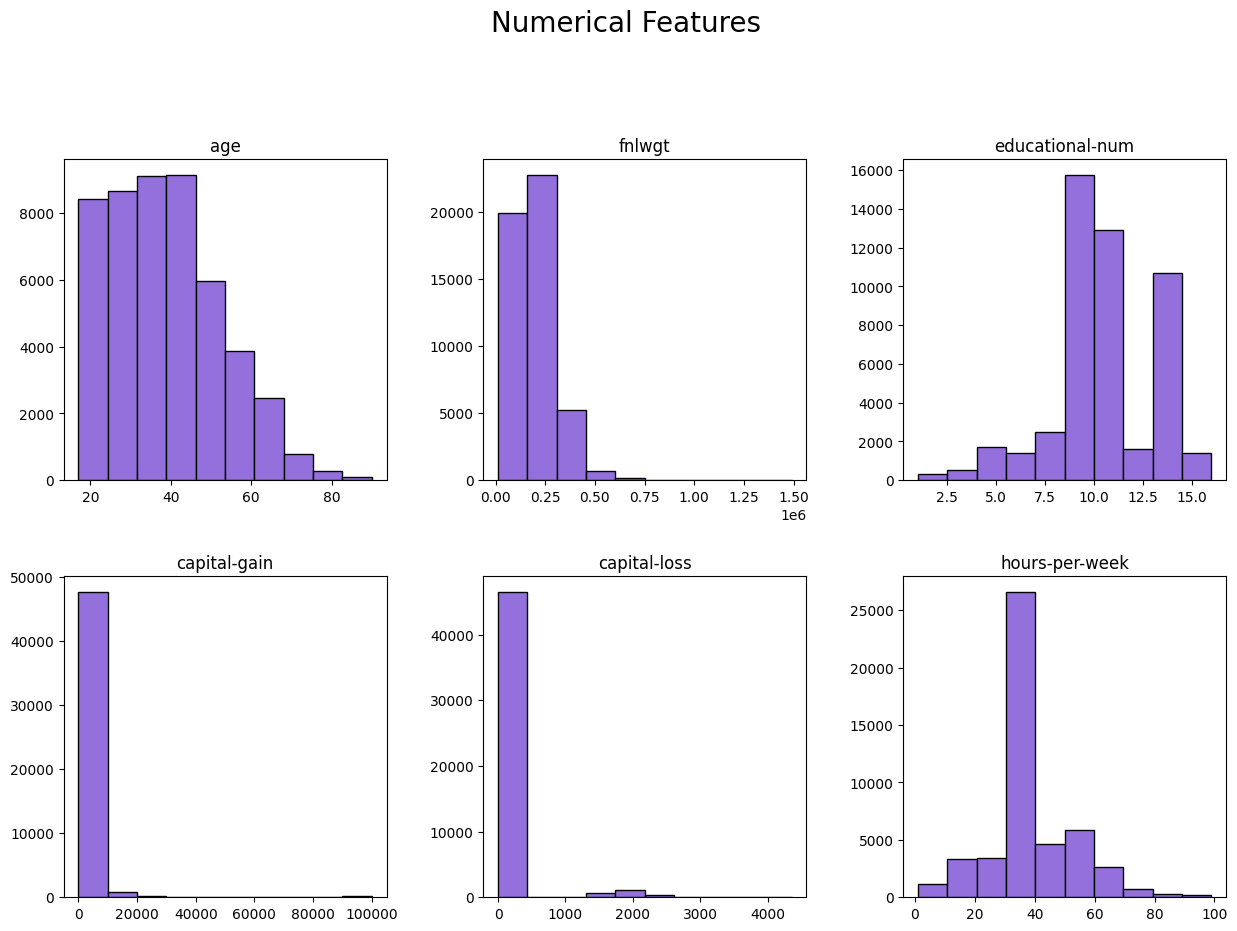

In [ ]:
df[numeric_data].hist(figsize=(15,15), layout=(3,3), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features', fontsize=20)

In [ ]:
df[numeric_data].corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076451,0.030635,0.077185,0.056838,0.071223
fnlwgt,-0.076451,1.000000,-0.038727,-0.003715,-0.004378,-0.013521
educational-num,0.030635,-0.038727,1.000000,0.125219,0.080986,0.143915
capital-gain,0.077185,-0.003715,0.125219,1.000000,-0.031475,0.082152
capital-loss,0.056838,-0.004378,0.080986,-0.031475,1.000000,0.054431
hours-per-week,0.071223,-0.013521,0.143915,0.082152,0.054431,1.000000


<Axes: >

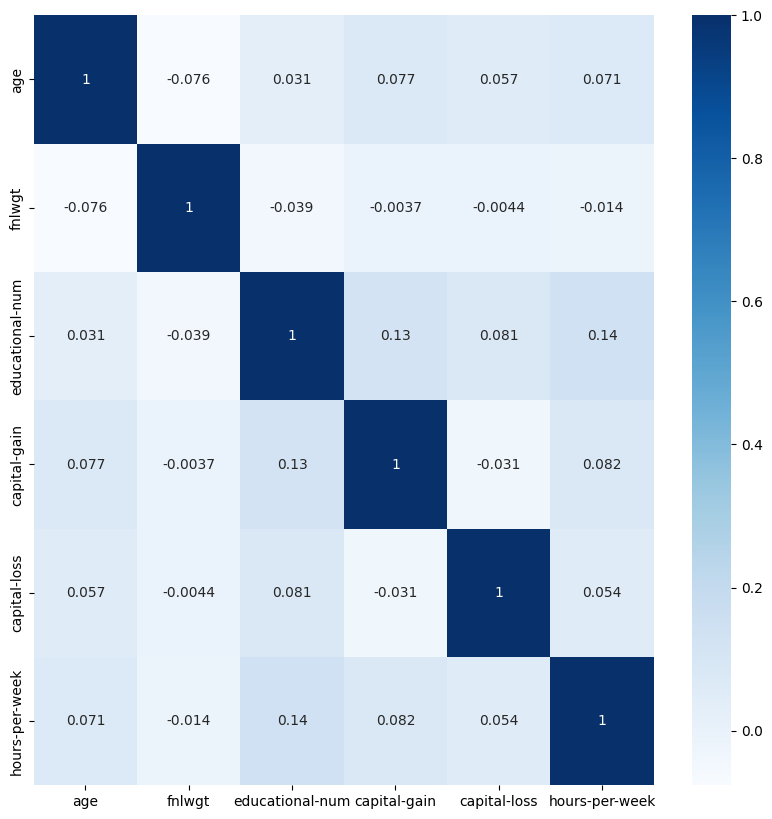

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_data].corr(), annot=True, cmap='Blues')

In [ ]:
for col in numeric_data:
  print(f'The min {col} = {df[col].min()}, and The max {col} = {df[col].max()}')

The min age = 17, and The max age = 90
The min fnlwgt = 12285, and The max fnlwgt = 1490400
The min educational-num = 1, and The max educational-num = 16
The min capital-gain = 0, and The max capital-gain = 99999
The min capital-loss = 0, and The max capital-loss = 4356
The min hours-per-week = 1, and The max hours-per-week = 99


{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fd8ca2390>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fd8ca2810>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fd8c366f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fd8ca2d80>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fd8ca3050>],
 'means': []}

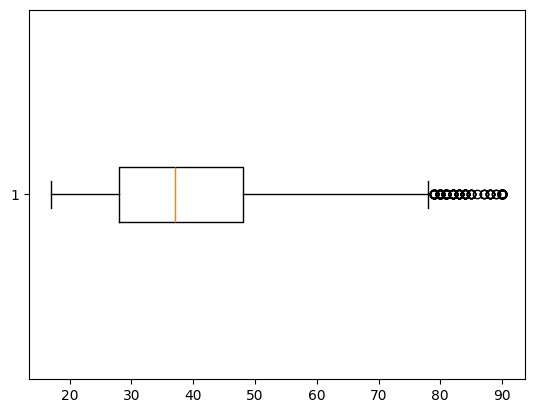

In [ ]:
plt.boxplot(df['age'], vert = False)

# **Categorical Data**

In [ ]:
df[categorical_data]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,NaN,Some-college,Never-married,NaN,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [ ]:
df[categorical_data].describe()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45995,48790,48790,45985,48790,48790,48790,47934,48790
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


In [ ]:
for col in categorical_data:
  print(f'Unique values in {col} = {df[col].unique()}')
  print("---------------------------------------------------------------------------------------------------------------\n")

Unique values in workclass = ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
---------------------------------------------------------------------------------------------------------------

Unique values in education = ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
---------------------------------------------------------------------------------------------------------------

Unique values in marital-status = ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
---------------------------------------------------------------------------------------------------------------

Unique values in occupation = ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-m

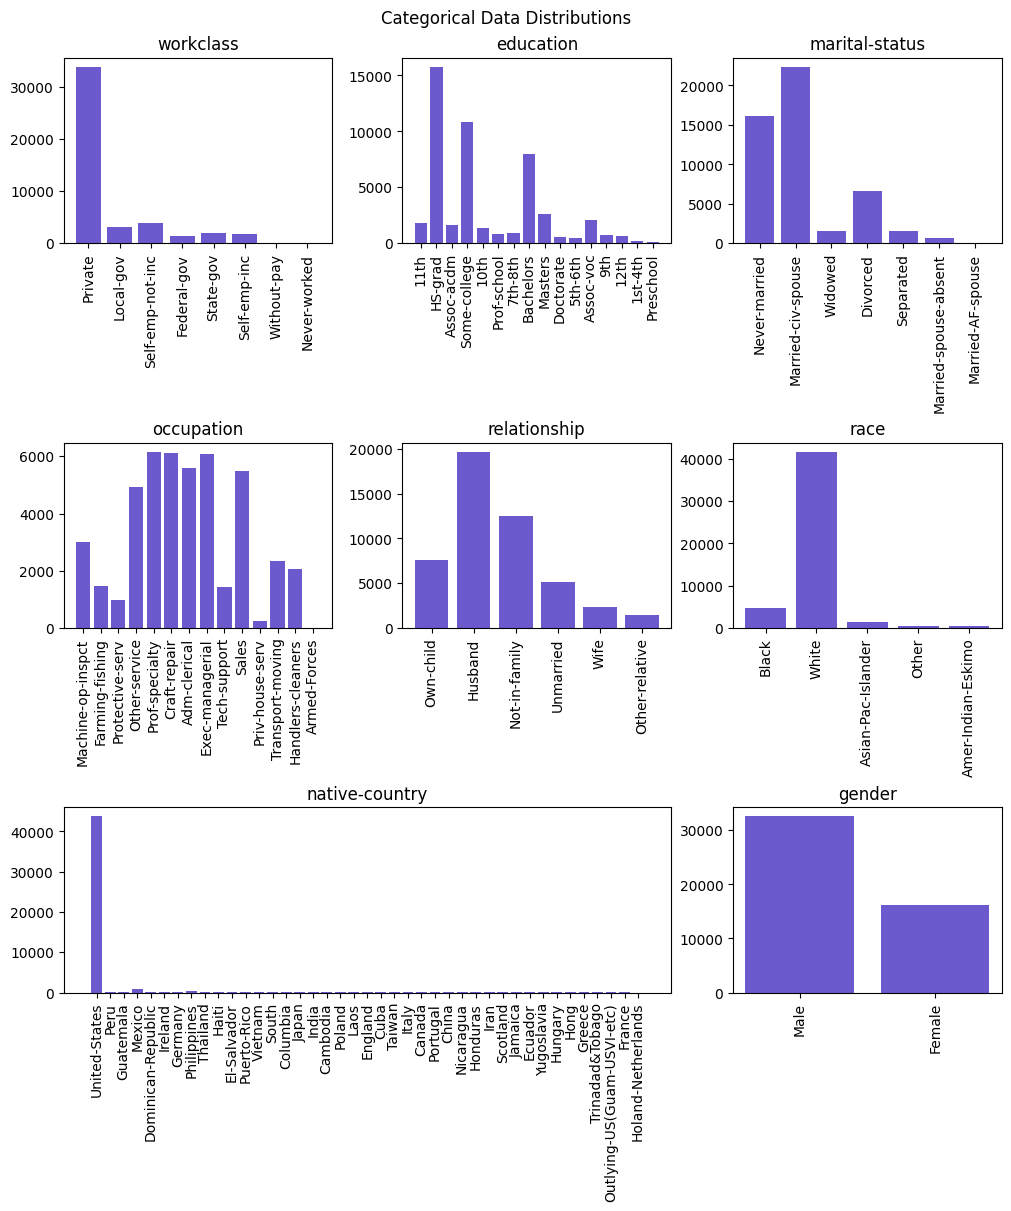

In [ ]:
fig = plt.figure(figsize=(10,12),layout='constrained')
fig.suptitle('Categorical Data Distributions')

gs = fig.add_gridspec(3,3)


ax1 = fig.add_subplot(gs[0, 0])
ax1.bar(list(df[categorical_data[0]].value_counts(sort=False).keys()),
             list(df[categorical_data[0]].value_counts(sort=False).values),color='slateblue')
ax1.set_title(categorical_data[0])
ax1.tick_params(axis='x', rotation=90)

ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(list(df[categorical_data[1]].value_counts(sort=False).keys()),
             list(df[categorical_data[1]].value_counts(sort=False).values),color='slateblue')
ax2.set_title(categorical_data[1])
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(list(df[categorical_data[2]].value_counts(sort=False).keys()),
             list(df[categorical_data[2]].value_counts(sort=False).values),color='slateblue')
ax3.set_title(categorical_data[2])
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[1, 0])
ax4.bar(list(df[categorical_data[3]].value_counts(sort=False).keys()),
             list(df[categorical_data[3]].value_counts(sort=False).values),color='slateblue')
ax4.set_title(categorical_data[3])
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, 1])
ax5.bar(list(df[categorical_data[4]].value_counts(sort=False).keys()),
             list(df[categorical_data[4]].value_counts(sort=False).values),color='slateblue')
ax5.set_title(categorical_data[4])
ax5.tick_params(axis='x', rotation=90)

ax6 = fig.add_subplot(gs[1, 2])
ax6.bar(list(df[categorical_data[5]].value_counts(sort=False).keys()),
             list(df[categorical_data[5]].value_counts(sort=False).values),color='slateblue')
ax6.set_title(categorical_data[5])
ax6.tick_params(axis='x', rotation=90)

ax7 = fig.add_subplot(gs[2, 0:2])
ax7.bar(list(df[categorical_data[7]].value_counts(sort=False).keys()),
             list(df[categorical_data[7]].value_counts(sort=False).values),color='slateblue')
ax7.set_title(categorical_data[7])
ax7.tick_params(axis='x', rotation=90)

ax8 = fig.add_subplot(gs[2, 2])
ax8.bar(list(df[categorical_data[6]].value_counts(sort=False).keys()),
             list(df[categorical_data[6]].value_counts(sort=False).values),color='slateblue')
ax8.set_title(categorical_data[6])
ax8.tick_params(axis='x', rotation=90)



plt.show()

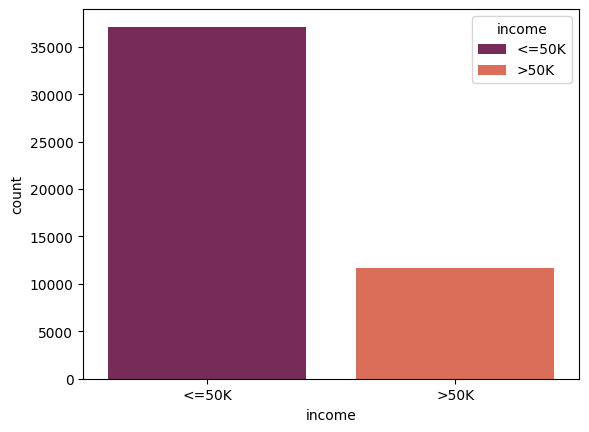

In [ ]:
sns.countplot(x = df['income'], palette='rocket', hue = df['income'], legend=True); #imbalanced data

In [ ]:
df.isna().sum()

,0
age,0
workclass,2795
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,2805
relationship,0
race,0
gender,0


In [ ]:
workclass_mode = df['workclass'].mode()[0]
occupation_mode = df['occupation'].mode()[0]
native_country_mode = df['native-country'].mode()[0]

df['workclass'] = df['workclass'].fillna(workclass_mode)
df['occupation'] = df['occupation'].fillna(occupation_mode)
df['native-country'] = df['native-country'].fillna(native_country_mode)

# another solution
# df['workclass'] = df['workclass'].replace('?', workclass_mode)
# df['occupation'] = df['occupation'].replace('?', occupation_mode)
# df['native-country'] = df['native-country'].replace('?', native_country_mode)

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


In [ ]:
df[categorical_data]

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
4,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
48837,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


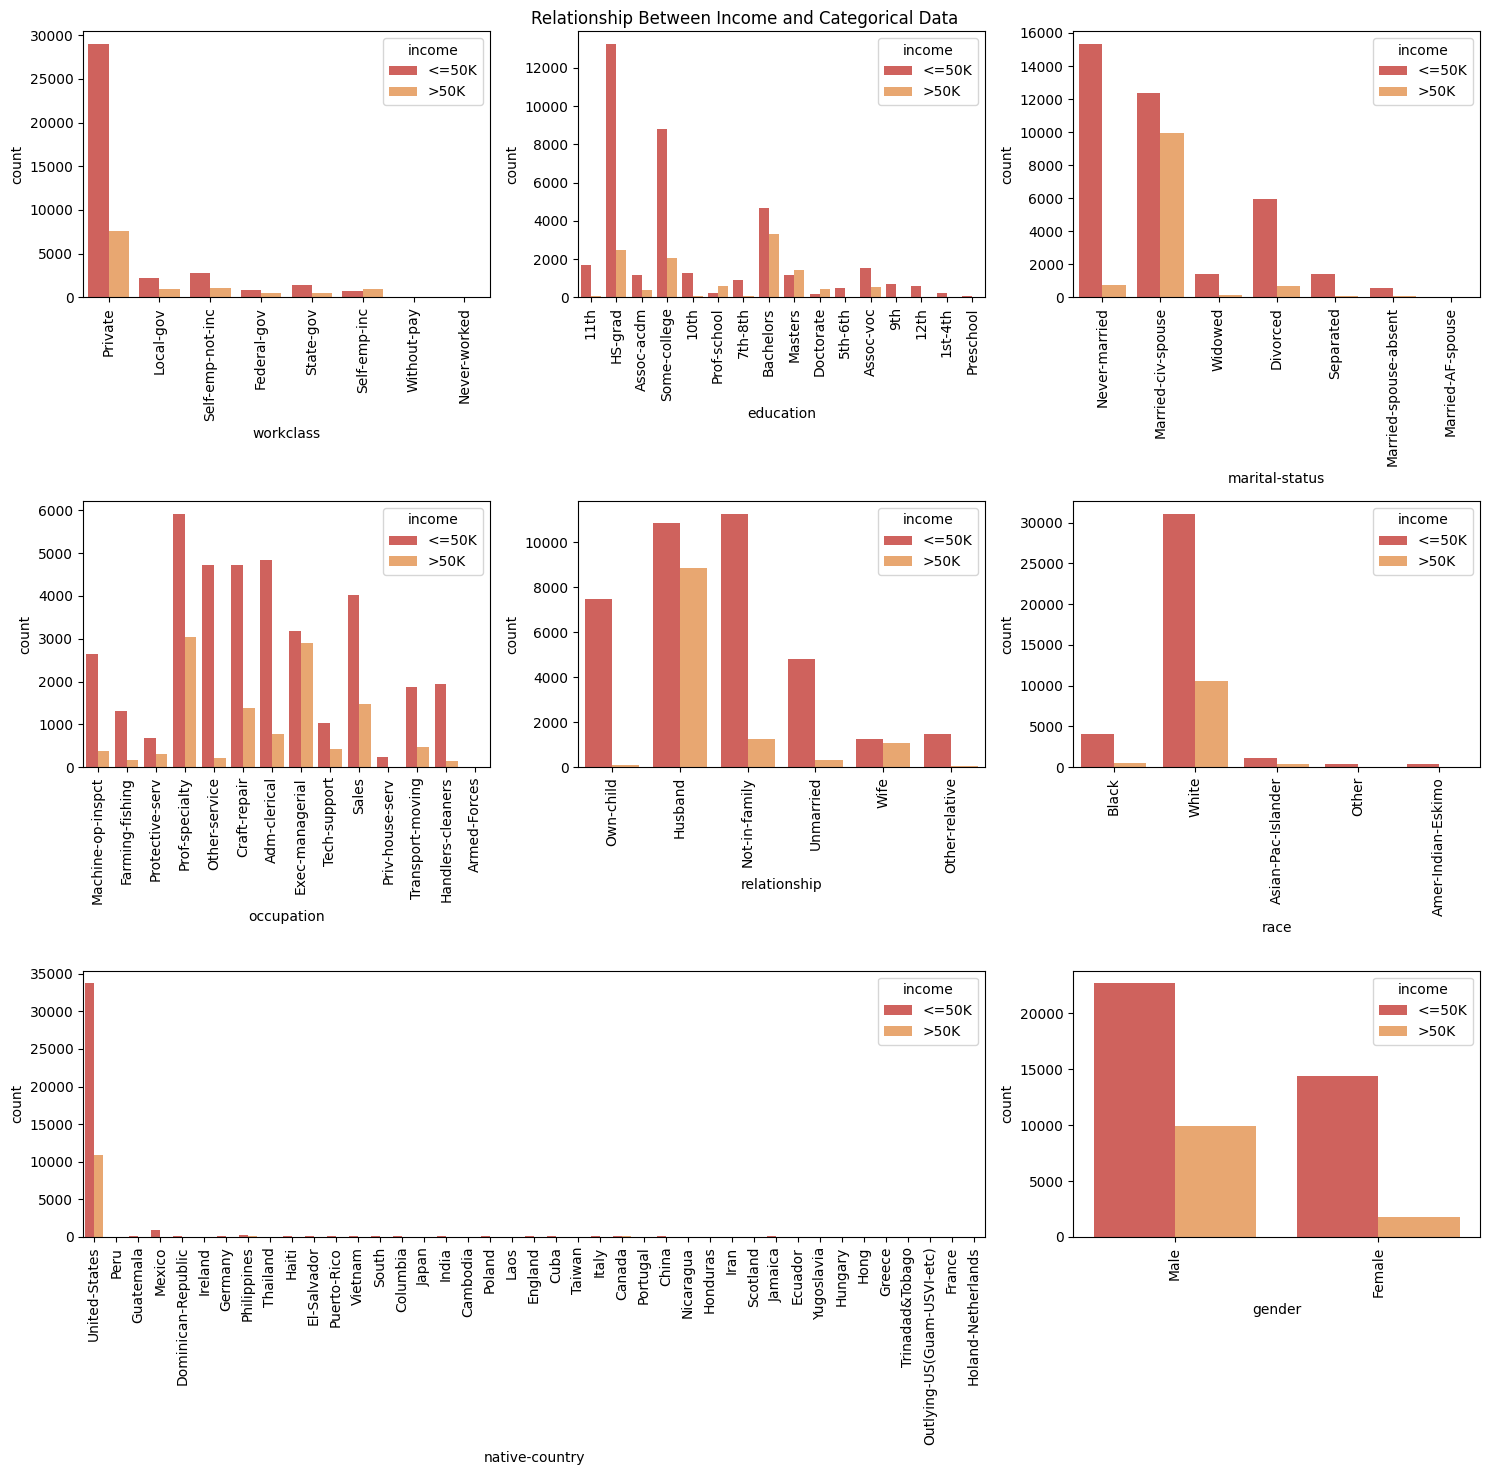

In [ ]:
fig = plt.figure(figsize=(15,15),layout='tight')
fig.suptitle('Relationship Between Income and Categorical Data')

gs = fig.add_gridspec(3,3)

sns.set_palette("Spectral")

ax1 = fig.add_subplot(gs[0, 0])
sns.countplot(ax=ax1, data=df, x=categorical_data[0],hue='income')
ax1.tick_params(axis='x', rotation=90)

ax2 = fig.add_subplot(gs[0, 1])
sns.countplot(ax=ax2, data=df, x=categorical_data[1],hue='income')
ax2.tick_params(axis='x', rotation=90)

ax3 = fig.add_subplot(gs[0, 2])
sns.countplot(ax=ax3, data=df, x=categorical_data[2],hue='income')
ax3.tick_params(axis='x', rotation=90)

ax4 = fig.add_subplot(gs[1, 0])
sns.countplot(ax=ax4, data=df, x=categorical_data[3],hue='income')
ax4.tick_params(axis='x', rotation=90)

ax5 = fig.add_subplot(gs[1, 1])
sns.countplot(ax=ax5, data=df, x=categorical_data[4],hue='income')
ax5.tick_params(axis='x', rotation=90)

ax6 = fig.add_subplot(gs[1, 2])
sns.countplot(ax=ax6, data=df, x=categorical_data[5],hue='income')
ax6.tick_params(axis='x', rotation=90)

ax7 = fig.add_subplot(gs[2, 0:2])
sns.countplot(ax=ax7, data=df, x=categorical_data[7],hue='income')
ax7.tick_params(axis='x', rotation=90)

ax8 = fig.add_subplot(gs[2, 2])
sns.countplot(ax=ax8, data=df, x=categorical_data[6],hue='income')
ax8.tick_params(axis='x', rotation=90)

plt.show()


In [ ]:
pd.DataFrame(df.groupby('workclass')['income'].value_counts())

count
workclass        income       
Federal-gov      <=50K     871
                 >50K      561
Local-gov        <=50K    2209
                 >50K      927
Never-worked     <=50K      10
Private          <=50K   29009
                 >50K     7646
Self-emp-inc     >50K      938
                 <=50K     756
Self-emp-not-inc <=50K    2784
                 >50K     1077
State-gov        <=50K    1451
                 >50K      530
Without-pay      <=50K      19
                 >50K        2

# **Drop & Encode & Scaling The Data**

In [ ]:
df.drop(columns=['fnlwgt','educational-num', 'capital-gain', 'capital-loss'], inplace=True)

In [ ]:
df.drop(columns=['native-country'], inplace=True)

In [ ]:
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,>50K
4,18,Private,Some-college,Never-married,Prof-specialty,Own-child,White,Female,30,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
48838,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
48839,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
48840,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

In [ ]:
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,3,1,4,6,3,2,1,40,0
1,38,3,11,2,4,0,4,1,50,0
2,28,1,7,2,10,0,4,1,40,1
3,44,3,15,2,6,0,2,1,40,1
4,18,3,15,4,9,3,4,0,30,0
...,...,...,...,...,...,...,...,...,...,...
48837,27,3,7,2,12,5,4,0,38,0
48838,40,3,11,2,6,0,4,1,40,1
48839,58,3,11,6,0,4,4,0,40,0
48840,22,3,11,4,0,3,4,1,20,0


In [ ]:
new_numiric = df.select_dtypes(include=['number']).columns
df[new_numiric]

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,3,1,4,6,3,2,1,40,0
1,38,3,11,2,4,0,4,1,50,0
2,28,1,7,2,10,0,4,1,40,1
3,44,3,15,2,6,0,2,1,40,1
4,18,3,15,4,9,3,4,0,30,0
...,...,...,...,...,...,...,...,...,...,...
48837,27,3,7,2,12,5,4,0,38,0
48838,40,3,11,2,6,0,4,1,40,1
48839,58,3,11,6,0,4,4,0,40,0
48840,22,3,11,4,0,3,4,1,20,0


In [ ]:
df

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,0.109589,0.428571,0.066667,0.666667,0.461538,0.6,0.5,1.0,0.397959,0.0
1,0.287671,0.428571,0.733333,0.333333,0.307692,0.0,1.0,1.0,0.500000,0.0
2,0.150685,0.142857,0.466667,0.333333,0.769231,0.0,1.0,1.0,0.397959,1.0
3,0.369863,0.428571,1.000000,0.333333,0.461538,0.0,0.5,1.0,0.397959,1.0
4,0.013699,0.428571,1.000000,0.666667,0.692308,0.6,1.0,0.0,0.295918,0.0
...,...,...,...,...,...,...,...,...,...,...
48837,0.136986,0.428571,0.466667,0.333333,0.923077,1.0,1.0,0.0,0.377551,0.0
48838,0.315068,0.428571,0.733333,0.333333,0.461538,0.0,1.0,1.0,0.397959,1.0
48839,0.561644,0.428571,0.733333,1.000000,0.000000,0.8,1.0,0.0,0.397959,0.0
48840,0.068493,0.428571,0.733333,0.666667,0.000000,0.6,1.0,1.0,0.193878,0.0


# **Detect & Handling Outliear**

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fd304b3e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fd304b9e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fd300f290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fd304bef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fd3094230>],
 'means': []}

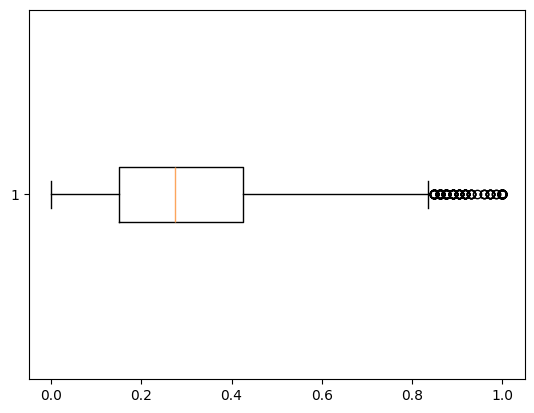

In [ ]:
plt.boxplot(df['age'], vert = False)

In [ ]:
Q3_age = np.percentile(df['age'], 75)
Q1_age = np.percentile(df['age'], 25)   # anomly detection (fucase on outliear)
IQR_age = Q3_age - Q1_age
max_age = Q3_age + (1.5 * IQR_age)
min_age = Q1_age - (1.5 * IQR_age)

In [ ]:
min_age

np.float64(-0.2602739726027397)

In [ ]:
max_age

np.float64(0.8356164383561644)

In [ ]:
df = df[(df['age'] >= min_age) & (df['age'] <= max_age)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fd30d25d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fd30d2bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fd30d22d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fd30d3140>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fd30d3440>],
 'means': []}

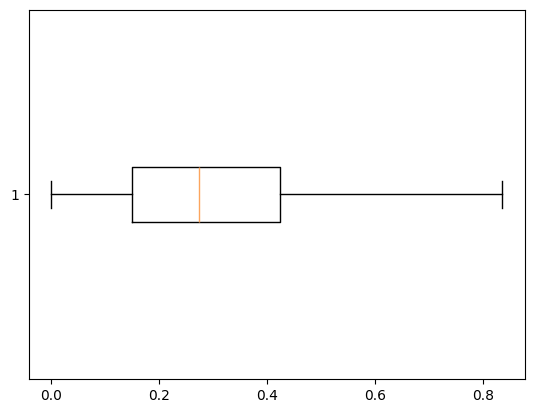

In [ ]:
plt.boxplot(df['age'], vert = False)

(array([7204., 7279., 7826., 7515., 6603., 4882., 3427., 2252., 1053.,
         534.]),
 array([0.        , 0.08356164, 0.16712329, 0.25068493, 0.33424658,
        0.41780822, 0.50136986, 0.58493151, 0.66849315, 0.75205479,
        0.83561644]),
 <BarContainer object of 10 artists>)

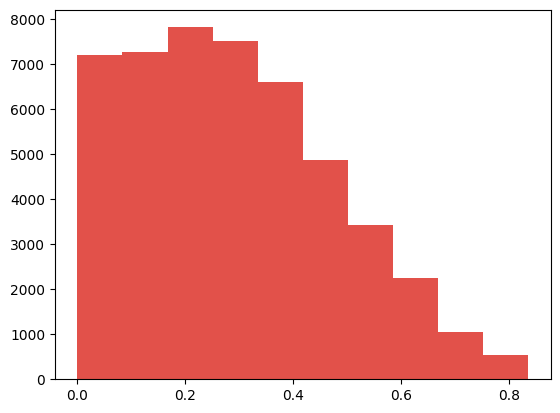

In [ ]:
plt.hist(df['age'], bins=10)

In [ ]:
df['age'] = np.log1p(df['age'])

/tmp/ipython-input-1529036667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age'] = np.log1p(df['age'])


(array([4703., 6049., 6330., 7854., 6052., 7129., 4426., 3486., 1894.,
         652.]),
 array([0.        , 0.06073804, 0.12147607, 0.18221411, 0.24295214,
        0.30369018, 0.36442822, 0.42516625, 0.48590429, 0.54664232,
        0.60738036]),
 <BarContainer object of 10 artists>)

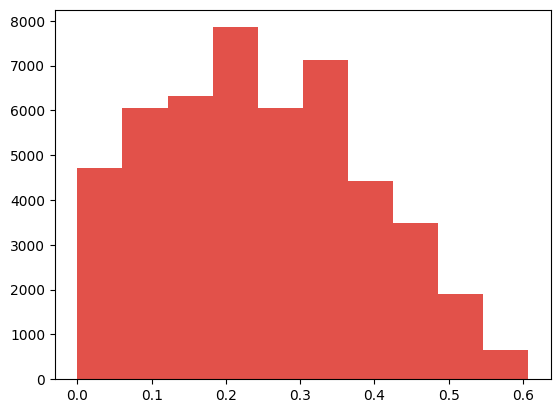

In [ ]:
plt.hist(df['age'], bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fd2e48530>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fd2e48950>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fd2f38830>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fd2e48ef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fd2e491c0>],
 'means': []}

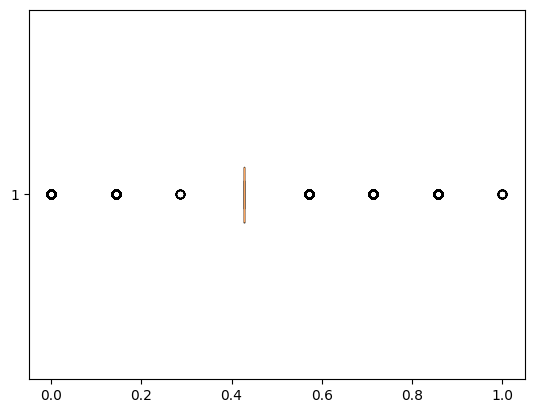

In [ ]:
plt.boxplot(df['workclass'], vert = False)

In [ ]:
Q3_workclass = np.percentile(df['workclass'], 75)
Q1_workclass = np.percentile(df['workclass'], 25)   # anomly detection (fucase on outliear)
IQR_workclass = Q3_workclass - Q1_workclass
max_workclass = Q1_workclass + (1.5 * IQR_workclass)
min_workclass = Q1_workclass - (1.5 * IQR_workclass)

In [ ]:
df = df[(df['workclass'] >= max_workclass) & (df['workclass'] <= min_workclass)]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1fd2e8a840>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1fd2e8ad80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1fd2e8a600>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1fd2e895e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1fd2e8b530>],
 'means': []}

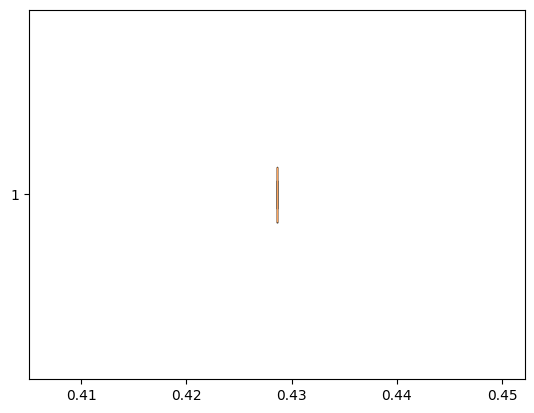

In [ ]:
plt.boxplot(df['workclass'], vert = False)

(array([    0.,     0.,     0.,     0.,     0., 36511.,     0.,     0.,
            0.,     0.]),
 array([-0.07142857,  0.02857143,  0.12857143,  0.22857143,  0.32857143,
         0.42857143,  0.52857143,  0.62857143,  0.72857143,  0.82857143,
         0.92857143]),
 <BarContainer object of 10 artists>)

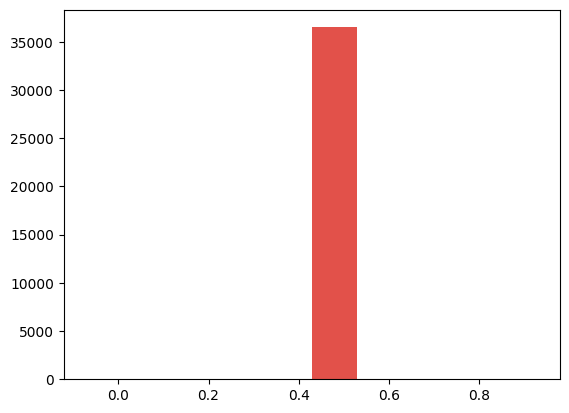

In [ ]:
plt.hist(df['workclass'], bins=10)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['income'], axis=1)

y = df['income']

In [ ]:
# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print("Train shape 1:", X_train.shape, y_train.shape)

print("Train shape 2:", X_train.shape, y_train.shape)

Train shape 1: (29208, 9) (29208,)
Train shape 2: (29208, 9) (29208,)


In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# --- تدريب نموذج SVM ---
C_value = 1.0  # يمكن تغييره إلى 0.1 أو 10 لمشاهدة الفرق
model = SVC(C=C_value, kernel='rbf')
model.fit(X_train, y_train)

# --- التنبؤ ---
y_pred = model.predict(X_test)

# --- تقييم النموذج ---
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8208955223880597


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- تدريب نموذج KNN ---
k = 5  # عدد الجيران
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train, y_train)

# --- التنبؤ ---
y_pred_knn = knn_model.predict(X_test)

# --- تقييم النموذج ---
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.8354101054361222


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# --- تدريب نموذج Logistic Regression ---
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# --- التنبؤ ---
y_pred_log = log_model.predict(X_test)

# --- تقييم النموذج ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7961111871833493


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# --- تدريب نموذج Decision Tree ---
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# --- التنبؤ ---
y_pred_dt = dt_model.predict(X_test)

# --- تقييم النموذج ---
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8213063124743256


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# --- تدريب نموذج Random Forest ---
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
rf_model.fit(X_train, y_train)

# --- التنبؤ ---
y_pred_rf = rf_model.predict(X_test)

# --- تقييم النموذج ---
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8217171025605915
